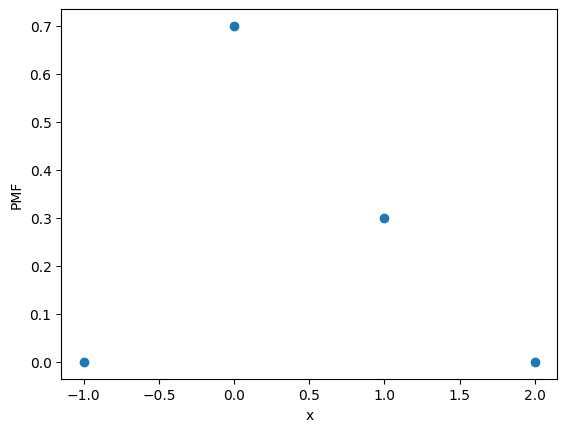

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat

p = 0.3

x = [-1, 0, 1, 2]
y = stat.bernoulli.pmf(x, p)

plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("PMF")
plt.show()

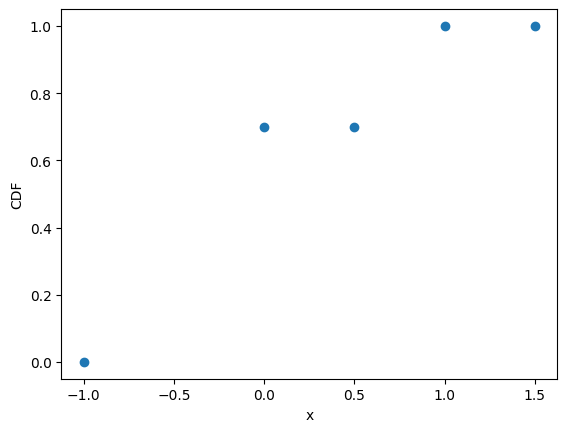

In [2]:
x = [-1, 0, 0.5, 1, 1.5]
y = stat.bernoulli.cdf(x, p)
# y=[0, 1-p, 1-p, 1, 1]
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("CDF") # Read a bit about CDF
plt.show()

In [3]:
x = [1, 2, 3, 4]
cumulative_array = []
sum = 0
for ele in x:
    cumulative_array.append(ele+sum)
    sum += ele
print(cumulative_array)

[1, 3, 6, 10]


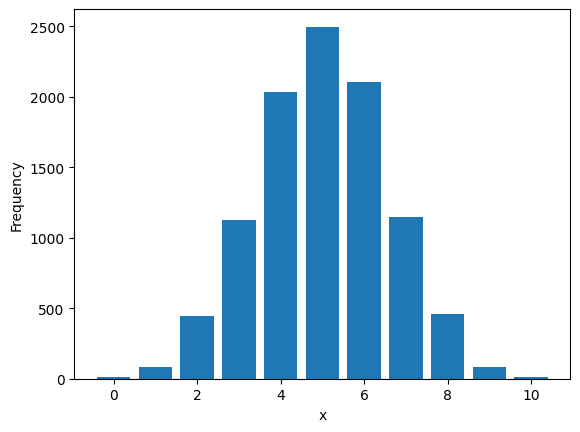

In [4]:
from collections import Counter

n = 10
p = 0.5

random_variates = stat.binom.rvs(n, p, size=10000)
freq = Counter(random_variates)

plt.bar(freq.keys(), freq.values())

plt.xlabel('x')
plt.ylabel('Frequency')
plt.show()

[0.00097656 0.00976563 0.04394531 0.1171875  0.20507812 0.24609375
 0.20507812 0.1171875  0.04394531 0.00976563 0.00097656]
0.9999999999999998


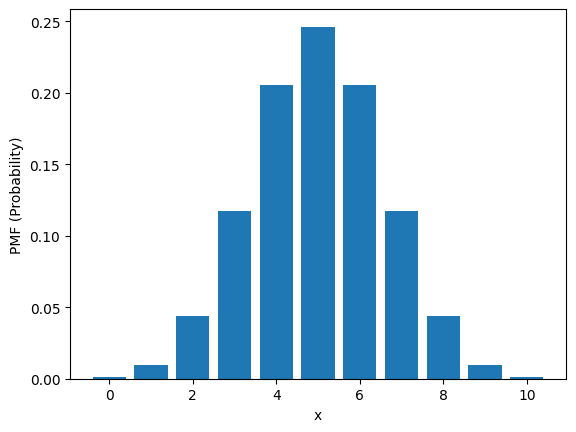

In [5]:
x = np.arange(11)
y = stat.binom.pmf(x, n, p)
print(y)
print(y.sum())
plt.bar(x, y)
plt.xlabel('x')
plt.ylabel('PMF (Probability)')
plt.show()

[9.76562500e-04 1.07421875e-02 5.46875000e-02 1.71875000e-01
 3.76953125e-01 6.23046875e-01 8.28125000e-01 9.45312500e-01
 9.89257812e-01 9.99023438e-01 1.00000000e+00]


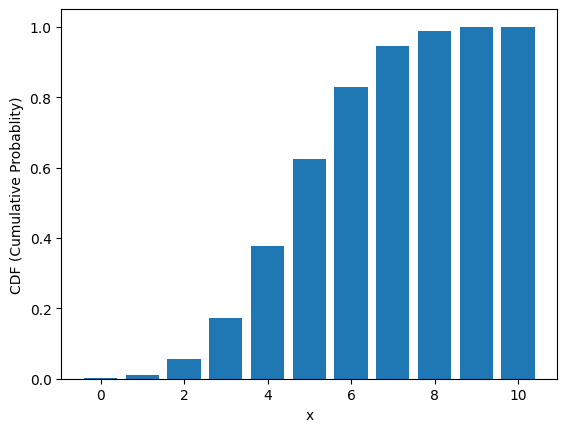

In [6]:
y = stat.binom.cdf(x, n, p)
print(y)

plt.bar(x, y)
plt.xlabel('x')
plt.ylabel('CDF (Cumulative Probablity)')
plt.show()

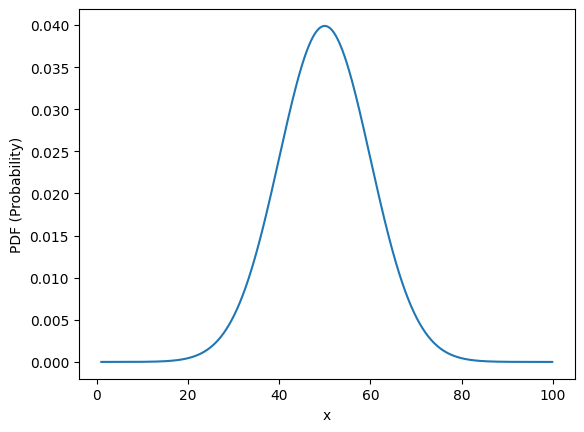

Incorrect Sum of area under the curve from 39 to 41: 0.4815289769845709
Correct Sum of area under the curve from 39 to 41: 0.048394064400376816


In [7]:
mu = 50
sigma = 10

x = np.arange(1, 100, 0.1)
y = stat.norm.pdf(x, loc=mu, scale=sigma)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('PDF (Probability)')
plt.show()

# INCORRECT WAY
pdf_40 = stat.norm.pdf(np.arange(39, 41, 0.1), loc=mu, scale=sigma)
print(f"Incorrect Sum of area under the curve from 39 to 41: {pdf_40.sum()}")  # THIS VALUE IS NOT CORRECT

# FOR CORRECT VALUE
from scipy.integrate import quad
def normal_pdf(x):
    return stat.norm.pdf(x, loc=mu, scale=sigma)
result, _ = quad(normal_pdf, 39, 41)
print(f"Correct Sum of area under the curve from 39 to 41: {result}")

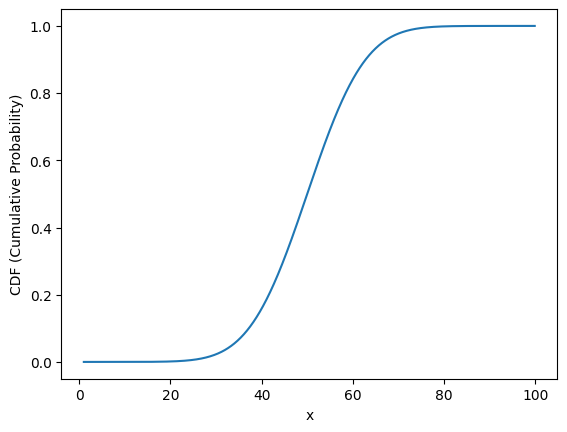

0.0483940644003768


In [8]:
y = stat.norm.cdf(x, loc=mu, scale=sigma)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('CDF (Cumulative Probability)')
plt.show()

print(stat.norm.cdf(41, loc=mu, scale=sigma) - stat.norm.cdf(39, loc=mu, scale=sigma)) 

In [9]:
sample = [
    45.72890767, 57.54074   , 57.74424154, 49.01023188, 65.82064244,
    74.64647005, 71.43935562, 56.56965998, 62.74854826, 62.74497962,
    55.32891303, 58.50888097, 56.4870966 , 36.30498791, 55.35951074,
    58.78489198, 58.05612933, 65.92703362, 58.14252147, 71.53713032,
    60.10056839, 65.52252553, 71.2515607 , 65.36640035, 63.85298975,
    58.62577178, 57.1900372 , 60.69841172, 57.46680469, 54.54782006,
    64.63465735, 51.92483114, 64.48192516, 59.02304139, 54.54468221,
    60.10394962, 74.3345832 , 51.74661325, 60.9057343 , 65.26049855,
    48.20977518, 51.55121313, 59.16774611, 85.5000865 , 58.57799841,
    56.54318968, 41.00254418, 61.55473646, 66.64809434, 47.75680707, 
    15.43483718, 16.13186908, 15.57226928, 12.41345967, 26.58716259,
    23.88670474, 23.14018873, 18.279609  , 22.55012777, 25.68339096,
    11.24359196, 17.57701799, 17.34347412, 30.36664984, 22.16632605,
    14.83508626, 21.75400292, 26.15033607, 18.20081078, 31.91644308,
    22.47250516, 20.02148907, 15.55271268, 18.27857685, 20.9660308 ,
    25.83615163, 22.08327585, 21.46572823, 23.90567488, 17.3321409 ,
    20.32825321, 27.04990061, 18.66636605, 28.76709141, 21.69811349,
    25.29080758, 13.22075277, 12.82817099, 22.44913153, 14.2253315 ,
    14.90517892, 16.3680904 , 16.13615834, 21.52562982, 22.22446452,
    18.7617733 , 22.88582609,  9.87183471, 24.12320574, 24.06825282]

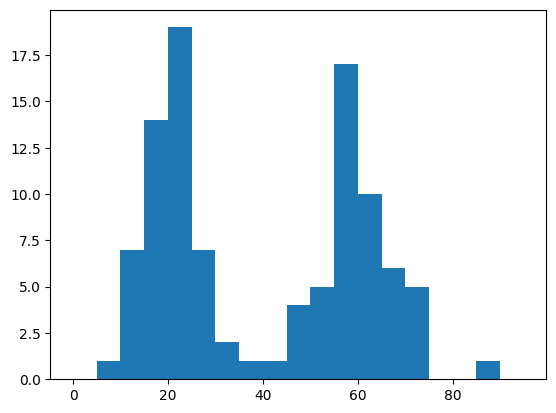

In [10]:
plt.hist(sample, bins=range(0, 100, 5))
plt.show()

9.907966533793276


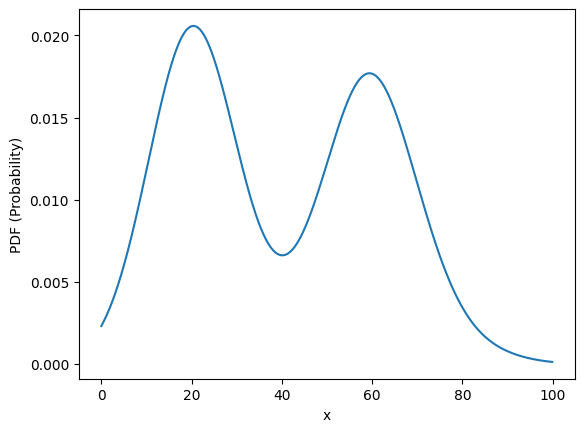

In [11]:
kde = stat.gaussian_kde(sample)

x = np.arange(0, 100, 0.1)
y = kde.pdf(x)

print(y.sum())

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('PDF (Probability)')
plt.show()

In [12]:
res = stat.ecdf(sample)

print(dir(res))
print(dir(res.cdf))

['__annotations__', '__class__', '__dataclass_fields__', '__dataclass_params__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__match_args__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'cdf', 'sf']
['__annotations__', '__class__', '__dataclass_fields__', '__dataclass_params__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__match_args__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_d', '_f', '_kind', '_linear_ci', '_loglog_ci', '_n', '_sf', 'confidence_interval', 'evaluate'

In [13]:
print(res.cdf.quantiles)
print(len(res.cdf.quantiles))

[ 9.87183471 11.24359196 12.41345967 12.82817099 13.22075277 14.2253315
 14.83508626 14.90517892 15.43483718 15.55271268 15.57226928 16.13186908
 16.13615834 16.3680904  17.3321409  17.34347412 17.57701799 18.20081078
 18.27857685 18.279609   18.66636605 18.7617733  20.02148907 20.32825321
 20.9660308  21.46572823 21.52562982 21.69811349 21.75400292 22.08327585
 22.16632605 22.22446452 22.44913153 22.47250516 22.55012777 22.88582609
 23.14018873 23.88670474 23.90567488 24.06825282 24.12320574 25.29080758
 25.68339096 25.83615163 26.15033607 26.58716259 27.04990061 28.76709141
 30.36664984 31.91644308 36.30498791 41.00254418 45.72890767 47.75680707
 48.20977518 49.01023188 51.55121313 51.74661325 51.92483114 54.54468221
 54.54782006 55.32891303 55.35951074 56.4870966  56.54318968 56.56965998
 57.1900372  57.46680469 57.54074    57.74424154 58.05612933 58.14252147
 58.50888097 58.57799841 58.62577178 58.78489198 59.02304139 59.16774611
 60.10056839 60.10394962 60.69841172 60.9057343  61.

In [14]:
print(res.cdf.probabilities)
print(len(res.cdf.probabilities))

[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14
 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28
 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42
 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56
 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7
 0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84
 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98
 0.99 1.  ]
100


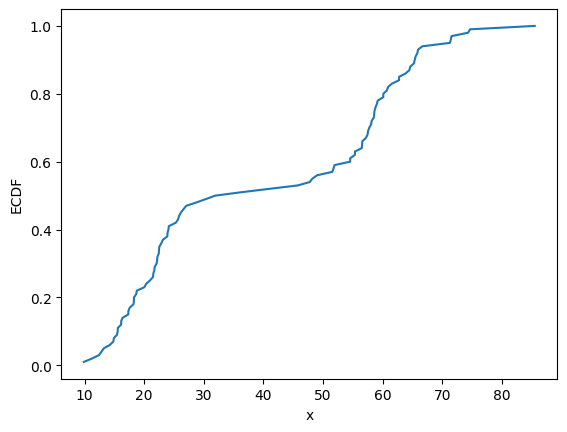

In [15]:
plt.plot(res.cdf.quantiles, res.cdf.probabilities)
plt.xlabel('x')
plt.ylabel('ECDF')
plt.show()